In [2]:
import http.client
import json
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
conn = http.client.HTTPSConnection("graphql.bitquery.io")
payload = json.dumps({
   "query": "query ($network: EthereumNetwork!, $limit: Int!, $offset: Int!, $from: ISO8601DateTime, $till: ISO8601DateTime) {\n  ethereum(network: $network) {\n    transfers(\n      options: {desc: \"count\", limit: $limit, offset: $offset}\n      amount: {gt: 0}\n      time: {since: $from, till: $till}\n    ) {\n      currency {\n        symbol\n        address\n      }\n      count\n      senders: count(uniq: senders)\n      receivers: count(uniq: receivers)\n      amount\n      amount_usd: amount(in: USD)\n    }\n  }\n}\n",
   "variables": "{\n  \"limit\": 100,\n  \"offset\": 10,\n  \"network\": \"ethereum\",\n  \"from\": \"2023-10-31T20:01:02.000Z\",\n  \"till\": \"2023-11-01T20:01:02.999Z\",\n  \"dateFormat\": \"%Y-%m-%d\"\n}"
})
headers = {
   'Content-Type': 'application/json',
   'X-API-KEY': 'BQYD44mQfBTF33j7OuCcsMIJlwHI7tzF'
}
conn.request("POST", "/", payload, headers)
res = conn.getresponse()
data = res.read()
response= json.loads(data.decode("utf-8"))


data_table= response['data']['ethereum']['transfers']
dataframe = pd.json_normalize(data_table)
print(dataframe)

    count  senders  receivers        amount    amount_usd currency.symbol  \
0    8633        1       2863  8.633000e+03  0.000000e+00           FREQS   
1    8244     2463       8236  4.205816e+08  0.000000e+00          ꓴSᎠ ꓔ܂   
2    7774      697       1124  2.692933e+08  8.408334e+06           TOKEN   
3    7543      131       1486  7.543000e+03  0.000000e+00           CRYNM   
4    6726     3548       5396  3.951570e+10  0.000000e+00            USDТ   
..    ...      ...        ...           ...           ...             ...   
95   1384      605        852  1.534574e+05  1.556721e+07             QNT   
96   1383      170        327  4.666458e+06  0.000000e+00           WAIFU   
97   1377      558        226  1.377000e+03  0.000000e+00         SCROLLS   
98   1364      359        298  2.074157e+11  6.530672e+06           FLOKI   
99   1359      379        375  5.843894e+08  0.000000e+00             LMI   

                              currency.address  
0   0xaa1be9c87a8d46e69b73

In [85]:
df = dataframe.head(10)
df.drop(df.index[(df['currency.symbol'] == "????")],axis=0,inplace=True)
symbol = df['currency.symbol']
count = df["count"]
amount = df["amount"]
amount_usd = df["amount_usd"]
senders = df["senders"]
receivers = df["receivers"]

Empty DataFrame
Columns: [count, senders, receivers, amount, amount_usd, currency.symbol, currency.address]
Index: []
None


C:\Users\ssbsa\AppData\Local\Temp\ipykernel_24252\3331549684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.index[(df['currency.symbol'] == "????")],axis=0,inplace=True)


c:\Users\ssbsa\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 5024 (\N{CHEROKEE LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ssbsa\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 1794 (\N{SYRIAC SUBLINEAR FULL STOP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


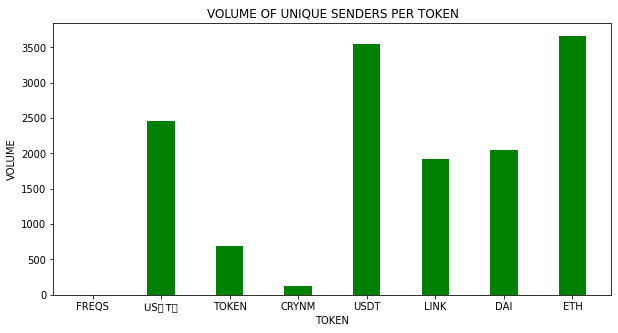

In [94]:
fig = plt.figure(figsize=(10,5))

plt.bar(symbol, senders, color='green', width=0.4)

plt.xlabel('TOKEN')
plt.ylabel('VOLUME')
plt.title("VOLUME OF UNIQUE SENDERS PER TOKEN")
plt.show()

c:\Users\ssbsa\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 5024 (\N{CHEROKEE LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ssbsa\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 1794 (\N{SYRIAC SUBLINEAR FULL STOP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


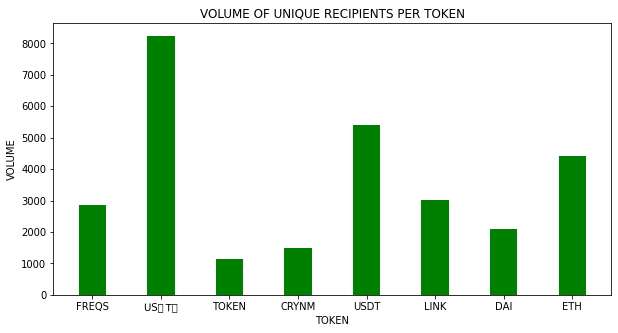

In [96]:
fig = plt.figure(figsize=(10,5))

plt.bar(symbol, receivers, color='green', width=0.4)

plt.xlabel('TOKEN')
plt.ylabel('VOLUME')
plt.title("VOLUME OF UNIQUE RECIPIENTS PER TOKEN")
plt.show()